# Classification metrics

## Accuracy

Accuracy is the proportion of correct classifications among all classifications. It a simple but might not work well on imbalanced data. When we use accuracy, we assign equal cost to false positives and false negatives. <br>
The problem starts when the actual costs that we assign to every error are not equal. If we deal with a rare but fatal disease, the cost of failing to diagnose the disease of a sick person is much higher than the cost of sending a healthy person to more tests.<br>
Thus, we need more nuanced metrics.

## ROC curve

A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm and can be calculated as (1 − specificity). It can also be thought of as a plot of the Power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity as a function of fall-out. In general, if the probability distributions for both detection and false alarm are known, the ROC curve can be generated by plotting the cumulative distribution function (area under the probability distribution from 
−
∞
to the discrimination threshold) of the detection probability in the y-axis versus the cumulative distribution function of the false-alarm probability on the x-axis.

ROC analysis provides tools to select possibly optimal models and related in a direct and natural way to cost/benefit analysis of diagnostic decision making.<br>
The ROC is also known as a relative operating characteristic curve, because it is a comparison of two operating characteristics (TPR and FPR) as the criterion changes.

### Basic concept

Let us consider a two-class prediction problem (binary classification), in which the outcomes are labeled either as positive (p) and negative (n). There are four possible outcomes from a binary classifier.

True positive (TP): If the outcome from a prediction is p and the actual value is also p.<br>
False positive (FP): If the outcome from a prediction is p, however the actual value is n.<br>
True negative (TN): If both the prediction outcome and the actual value are n.<br>
False negative (FN): If the prediction outcome is n while the actual value is p.

Let us define an experiment from P positive instances and N negative instances for some condition. The four outcomes can be formulated in a 2×2 contingency table or confusion matrix, as follows:

![title](basic concept.png)

Terminology and derivations:

 ![title](t1.png)

 ![title](t2.png)

 ![title](f1score.png)

### ROC space

To draw a ROC curve, only the true positive rate (TPR) and false positive rate (FPR) are needed (as functions of some classifier parameter). The TPR defines how many correct positive results occur among all positive samples available during the test. FPR, on the other hand, defines how many incorrect positive results occur among all negative samples available during the test.


A ROC space is defined by FPR and TPR as x and y axes, respectively, which depicts relative trade-offs between true positive (benefits) and false positive (costs). Since TPR is equivalent to sensitivity and FPR is equal to 1 − specificity, the ROC graph is sometimes called the sensitivity vs (1 − specificity) plot. Each prediction result or instance of a confusion matrix represents one point in the ROC space.

The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing 100% sensitivity (no false negatives) and 100% specificity (no false positives). The (0,1) point is also called a perfect classification. A random guess would give a point along a diagonal line (the so-called line of no-discrimination) from the left bottom to the top right corners (regardless of the positive and negative base rates). An intuitive example of random guessing is a decision by flipping coins. As the size of the sample increases, a random classifier's ROC point tends towards the diagonal line. In the case of a balanced coin, it will tend to the point (0.5, 0.5).

The diagonal divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random). 

![title](roc space.png)

![title](roc2.png)

### Area under the curve

The area under the curve (often referred to as simply the AUC) is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one(assuming 'positive' ranks higher than 'negative').

AUC ranges in value from 0 to 1- with an uninformative classifier yielding 0.5. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

![title](auc.jpg)

### Multi-class ROC analysis

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output.<br> 

There are then a number of ways to average binary metric calculations across the set of classes, each of which may be useful in some scenario.Where available, you should select among these using the "average" parameter.<br>
"macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.<br>
"weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.<br>
"micro" gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored. It performs better than "macro" in inbalanced data. <br>
"samples" applies only to multilabel problems. It does not calculate a per-class measure, instead calculating the metric over the true and predicted classes for each sample in the evaluation data, and returning their (sample_weight-weighted) average.<br>
Selecting average=None will return an array with the score for each class.

## Example

### Explore data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)# display all the columns
raw_data = pd.read_csv('a_20s_1600_Het_h_0.4MAF_0.2_r_50_EDM-2_01.txt', sep = "\t")# read in dataset

In [3]:
raw_data.head() # show first 5 rows of the dataset

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
0,0,0,1,1,0,0,2,0,0,2,2,0,0,1,2,0,1,1,1,1,1
1,0,2,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,1,1,1,1
2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1
3,0,2,0,1,0,0,0,0,0,1,1,0,0,2,0,0,1,1,1,1,1
4,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1


In [4]:
print ("Number of rows: " + str(raw_data.shape[0])) # row count
print ("Number of columns: " + str(raw_data.shape[1])) # column count

Number of rows: 1600
Number of columns: 21


In [5]:
raw_data.describe() # descriptive statistics 

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000
mean,0.081250,0.719375,0.379375,0.806250,0.072500,0.837500,0.488125,0.653125,0.354375,1.007500,0.515000,0.080625,0.258750,0.83875,0.900000,0.403750,0.530000,0.53000,0.518750,0.516250,0.500000
std,0.275583,0.675211,0.560710,0.691202,0.264173,0.703671,0.611427,0.668455,0.541042,0.715202,0.630495,0.285790,0.477693,0.71191,0.687601,0.569815,0.579275,0.60152,0.581902,0.572224,0.500156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000


In [6]:
raw_data.isnull().values.any() # check missing data

False

Text(0,0.5,'Count')

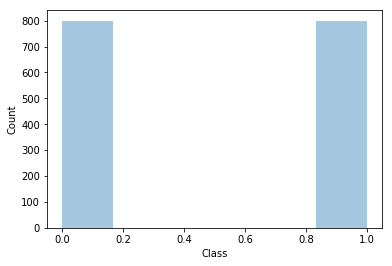

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.distplot(raw_data['Class'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

It is a balanced dataset.

In [8]:
#clean data
data_clean = raw_data.iloc[:, -5:]

In [9]:
y = data_clean.iloc[:, -1].values
X = data_clean.iloc[:, :-1].values
n_samples, n_features = X.shape

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Classification and ROC analysis

In [11]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

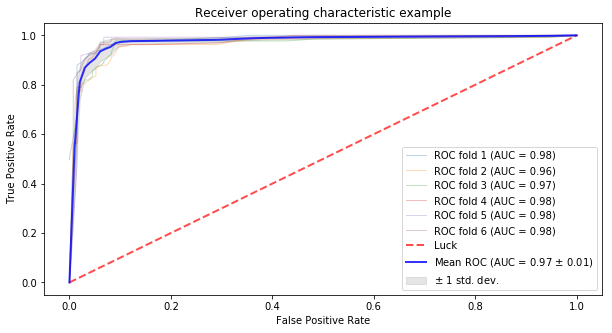

<Figure size 720x360 with 0 Axes>

In [45]:
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))# One-dimensional linear interpolation.Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.
    tprs[-1][0] = 0.0 # set true positive value to be 0.0 when false positive value is 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.7)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

#The default figure size (in inches) is controlled by
#matplotlib.rcParams['figure.figsize'] = [width, height]

plt.rcParams['figure.figsize'] = [10, 5]
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#plt.figure(figsize=(20,10))
plt.figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()


### Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [13]:
from sklearn.cross_validation import KFold

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True) # Total number of elements；Number of folds， default=3；Whether to shuffle the data before splitting into batches
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [15]:
RF_CV_result = run_cv(X,y,RandomForestClassifier)

In [16]:
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

In [17]:
print ("Random forest: " + str(accuracy(y, RF_CV_result)))

Random forest: 0.94375


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y,RF_CV_result)

In [20]:
print(cm)

[[739  61]
 [ 29 771]]


In [21]:
#By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
precision = tp / (tp + fp + 0.0)
recall = tp / (tp + fn + 0.0)

In [22]:
y = np.array(y)
class_names = np.unique(y)
print (class_names)

[0 1]


Random Forest
Accuracy is 0.94375
Precision is 0.9266826923076923
Recall is 0.96375


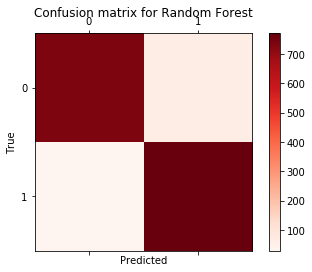

In [23]:
%matplotlib inline
class_names = [0, 1]
print ("Random Forest")
print ("Accuracy is " + str(accuracy))
print ("Precision is " + str(precision))
print ("Recall is " + str(recall))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
plt.title('Confusion matrix for Random Forest')
fig.colorbar(cax)
ax.set_xticklabels([''] + class_names)
ax.set_yticklabels([''] + class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Reference：<br>
http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve<br>
https://stats.stackexchange.com/questions/312780/why-is-accuracy-not-the-best-measure-for-assessing-classification-models <br>
https://en.wikipedia.org/wiki/Receiver_operating_characteristic<br>
http://scikit-learn.org/stable/modules/model_evaluation.html#average<br>
https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin